In [1]:
from Functions import *
from Optimizations import *
from Saving import *
import numpy as np
from scipy import stats
from Kernels import *
from utils import *

import plotly.graph_objects as go

from scipy import integrate
import time
import pandas as pd
import pickle

# Ackely Problem

In [2]:
U = AckleyProblem
grad_U = GradAckleyProblem

In [ ]:
X = np.linspace(-20, 20, 200)
Y = np.linspace(-20, 20, 200)

inp = np.array(np.meshgrid(X, Y))
out = U(inp)

In [3]:
gibbs_out = Gibbs(inp, U, 1) * np.max(out)*1.2 + 25

fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis"), #]) 
                      go.Surface(z=gibbs_out, x=X, y=Y, colorscale="Blues", showscale=False, opacity=0.6)])

fig.update_layout(title='Ackely Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [6]:
rho = 0.118

# Parameters 

### k = 4
### Starting Position = (20, 20, 20, 20, 20)
### Gamma = 2 / log(2*t + 2)
### Temperature = 2 / log(t + 2)
### Constant Temperature = 5
### Rho = 0.118
### Kernel Density = 3
### Number of Trials = 50
### Number of Iterations per trial= 5000 (for particle simulation only 1000 due to time constraints)
### Number of Particles = 5
### 10 steps of first process for every second process step

## Get Data

In [102]:
path_ssa_five = "./tmp/analytics_paths_simulated_annealing_5_1574765201.28107"
analytics_ssa, paths_ssa = load_analytics_paths(path_ssa_five)
filter_ssa_analytics = filter_to_goal(np.array([0]*5), 2*rho, analytics_ssa)

path_iag_five = "./tmp/{}".format("analytics_paths_approx_gibbs_5_1574765110.8210502")
analytics_iag, paths_iag = load_analytics_paths(path_iag_five)
filter_iag_analytics = filter_to_goal(np.array([0]*5), 2*rho, analytics_iag)

path_iap_five = "./tmp/{}".format("analytics_paths_approx_interactive_5_1574766796.67196")
analytics_iap, paths_iap = load_analytics_paths(path_iap_five)
filter_iap_analytics = filter_to_goal(np.array([0]*5), 2*rho, analytics_iap)


# Probability of success and average convergence

### Standard Simulated Annealing

In [ ]:
print("Probability", percent_endpoint(np.array([0]*5), analytics_ssa["end_point"], 2*rho))

In [103]:
print("Average times:")
print(analytics_ssa[filter_ssa_analytics][["time", "total_iterations"]].mean())

Probability 0.8
Average times:
time                   0.23479
total_iterations    2095.50000
dtype: float64


### Interactive - Gibbs

In [104]:
print("Probability", percent_endpoint(np.array([0]*5), analytics_iag["end_point"], 2*rho))

Probability 0.88


In [105]:
print("Average times:")
print(analytics_iag[filter_iag_analytics][["time", "total_iterations"]].mean())

Average times:
time                   0.576253
total_iterations    2546.545455
dtype: float64


### Interactive - Particle

In [106]:
print("Probability", percent_endpoint(np.array([0]*5), analytics_iap["end_point"], 2*rho))

Probability 0.1


In [108]:
print("Average times:")
print(analytics_iap[filter_iap_analytics][["time", "total_iterations", "main_process_iter"]].mean())

Average times:
time                     12.687044
total_iterations     100846.000000
main_process_iter       836.000000
dtype: float64


# Endpoints for every Trial

### Standard Simulated Annealing

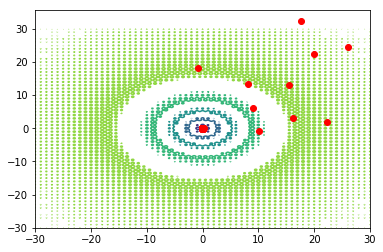

In [109]:
show_end_points_pictures(analytics_ssa["end_point"], inp[0], inp[1], out, graph_type="contour", graph_details={"interpolation": "bilinear", "lines": 6})


### Interactive - Gibbs

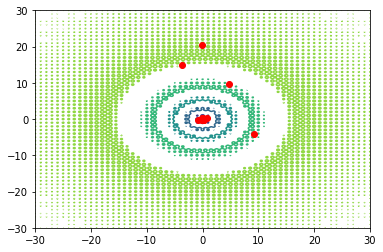

In [110]:
show_end_points_pictures(analytics_iag["end_point"], inp[0], inp[1], out, graph_type="contour", graph_details={"interpolation": "bilinear", "lines": 6})


### Interactive - Particle

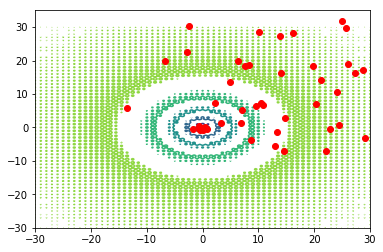

In [111]:
show_end_points_pictures(analytics_iap["end_point"], inp[0], inp[1], out, graph_type="contour", graph_details={"interpolation": "bilinear", "lines": 6})


# Time Histograms

### Standard Simulated Annealing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134429b38>]],
      dtype=object)

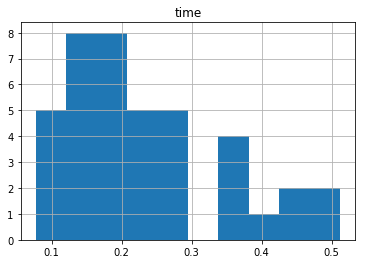

In [90]:
analytics_ssa[filter_ssa_analytics].hist(["time"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134c2a898>]],
      dtype=object)

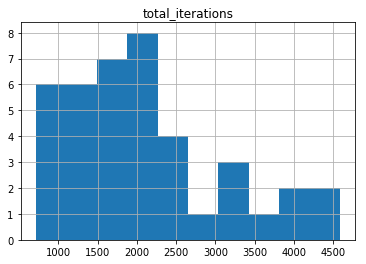

In [91]:
analytics_ssa[filter_ssa_analytics].hist(["total_iterations"])

### Interactive - Gibbs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134ca27b8>]],
      dtype=object)

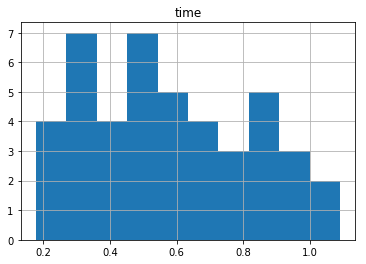

In [94]:
analytics_iag[filter_analytics_iag].hist(["time"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d0b668>]],
      dtype=object)

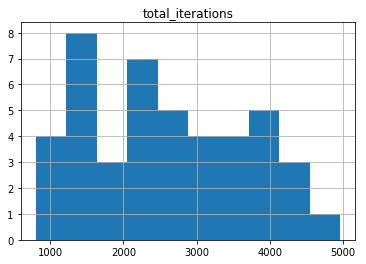

In [95]:
analytics_iag[filter_analytics_iag].hist(["total_iterations"])

### Interactive - Particle

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d75b38>]],
      dtype=object)

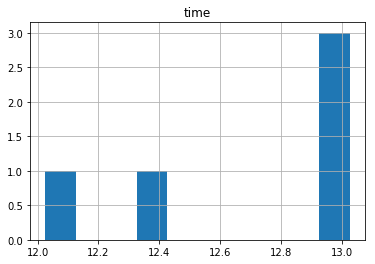

In [98]:
analytics_iap[filter_analytics_iap].hist(["time"])

In [99]:
analytics_iap[filter_analytics_iap].hist(["total_iterations"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d0b828>]],
      dtype=object)

In [100]:
analytics_iap[filter_analytics_iap].hist(["main_process_iter"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134dbd940>]],
      dtype=object)